# Make Model

## Import Libs and Load Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('outputs\dataset_for_kaggle.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16948 entries, 0 to 16947
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date_time                                         16948 non-null  object 
 1   air_pollution_index                               16948 non-null  float64
 2   humidity                                          16948 non-null  float64
 3   wind_speed                                        16948 non-null  float64
 4   wind_direction                                    16948 non-null  float64
 5   visibility_in_miles                               16948 non-null  float64
 6   dew_point                                         16948 non-null  float64
 7   temperature                                       16948 non-null  float64
 8   rain_p_h                                          16948 non-null  float64
 9   snow_p_h         

,date_time,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,weather_description_sky is clear,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with light rain,weather_description_very heavy rain,day,month,hour,traffic_volume
0,2015-06-11 20:00:00,0.941176,0.583333,0.1875,0.908333,0.50000,0.50000,0.691273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.869565,0.396429
1,2015-06-11 21:00:00,0.910035,0.583333,0.1875,0.908083,0.50625,0.50625,0.698311,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.913043,0.405757
2,2015-06-11 22:00:00,0.878893,0.583333,0.1875,0.907833,0.51125,0.51125,0.705349,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,0.956522,0.415085
3,2015-06-11 23:00:00,0.847751,0.583333,0.1875,0.907583,0.51750,0.51750,0.712387,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,1.000000,0.424413
4,2015-06-12 00:00:00,0.816609,0.583333,0.1875,0.907333,0.52250,0.52250,0.719581,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.366667,0.454545,0.000000,0.433742


In [10]:
df = df.set_index('date_time')

In [11]:
X = np.load('outputs/train_x_second_v3.npy')
y = np.load('outputs/train_y_second_v3.npy')

In [12]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (16924, 24, 62)
y shape: (16924, 1)


## Train Test Split

In [13]:
total_sample = X.shape[0]
split_index = int(total_sample * 0.9)

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [14]:
print(f'X_train length == {len(X_train)}')
print(f'X_test length == {len(X_test)}')

X_train length == 15231
X_test length == 1693


## Modelling

In [210]:
import keras

In [211]:
keras.__version__

'2.3.1'

In [11]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

Using TensorFlow backend.
c:\Users\Naufal\anaconda3\envs\shap_upgrade\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\Naufal\anaconda3\envs\shap_upgrade\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\Naufal\anaconda3\envs\shap_upgrade\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\Naufal\anacond

```
units_layer1 32
activation tanh
units_layer2 48
dropout 0.1
optimizer adam
```

In [12]:
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', 
                            input_shape=(X_train.shape[1], X_train.shape[2]),
                            return_sequences=True)))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam', loss='mae')

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Train on 15231 samples, validate on 1693 samples
Epoch 1/50
15231/15231 [==============================] - 23s 1ms/step - loss: 0.1204 - val_loss: 0.0856
Epoch 2/50
15231/15231 [==============================] - 15s 967us/step - loss: 0.0797 - val_loss: 0.0559
Epoch 3/50
15231/15231 [==============================] - 14s 946us/step - loss: 0.0651 - val_loss: 0.0526
Epoch 4/50
15231/15231 [==============================] - 14s 891us/step - loss: 0.0595 - val_loss: 0.0434
Epoch 5/50
15231/15231 [==============================] - 15s 964us/step - loss: 0.0563 - val_loss: 0.0480
Epoch 6/50
15231/15231 [==============================] - 15s 977us/step - loss: 0.0539 - val_loss: 0.0394
Epoch 7/50
15231/15231 [==============================] - 14s 937us/step - loss: 0.0519 - val_loss: 0.0407
Epoch 8/50
15231/15231 [==============================] - 16s 1ms/step - loss: 0.0502 - val_loss: 0.0359
Epoch 9/50
15231/15231 [==============================] - 17s 1ms/step - loss: 0.0481 - val_loss: 

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 24, 128)           65024     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 163,969
Trainable params: 163,969
Non-trainable params: 0
_________________________________________________________________


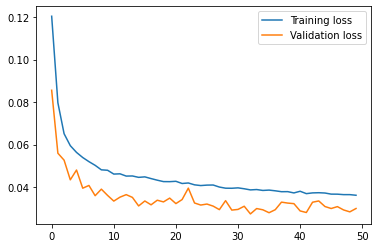

In [14]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [93]:
# model.save('model/shap/BiLSTM_second.h5')

In [212]:
!pip install joblib

In [213]:
from joblib import dump

# Assuming 'model' is your Keras model
# dump(model, 'model/shap/BiLSTM_second.joblib')

['model/shap/BiLSTM_second.joblib']

## Predict

In [15]:
pred = model.predict(X_test)

In [214]:
pred

array([[0.63573   ],
       [0.6774238 ],
       [0.70349616],
       ...,
       [0.33745384],
       [0.28169432],
       [0.17996536]], dtype=float32)

In [97]:
pred.shape

(1693, 1)

# Explaining Model using SHAP

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import shap
# init the JS visualization code
shap.initjs()

In [5]:
shap.__version__

'0.41.0'

In [7]:
model = joblib.load('model/shap/BiLSTM_second.joblib')

Using TensorFlow backend.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of nump

In [20]:
features = df.columns.tolist()

In [17]:
# Use the training data for deep explainer => can use fewer instances
explainer = shap.DeepExplainer(model, X_train[:500])

In [18]:
# explain the the testing instances (can use fewer instanaces)
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X_test[:100])

## Local Explanation

**Force Plot**

This plot is showing how each feature contribute to the prediction. For this below plot, it show a plot for the first time step on the first instance of X_test.

In [21]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0][0], features)

**Stacked Force Plot**

To show all time step on an instance, we can use stacked forceplot. In this plot, we can see all 24 time steps of the first instance of X_test.

In [22]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features)

**Barplot**

In this plot, we can see the 10 most impactful feature for the prediction.

In [23]:
import seaborn as sns

Here's is top 10 feature for the first time step of the first instance.

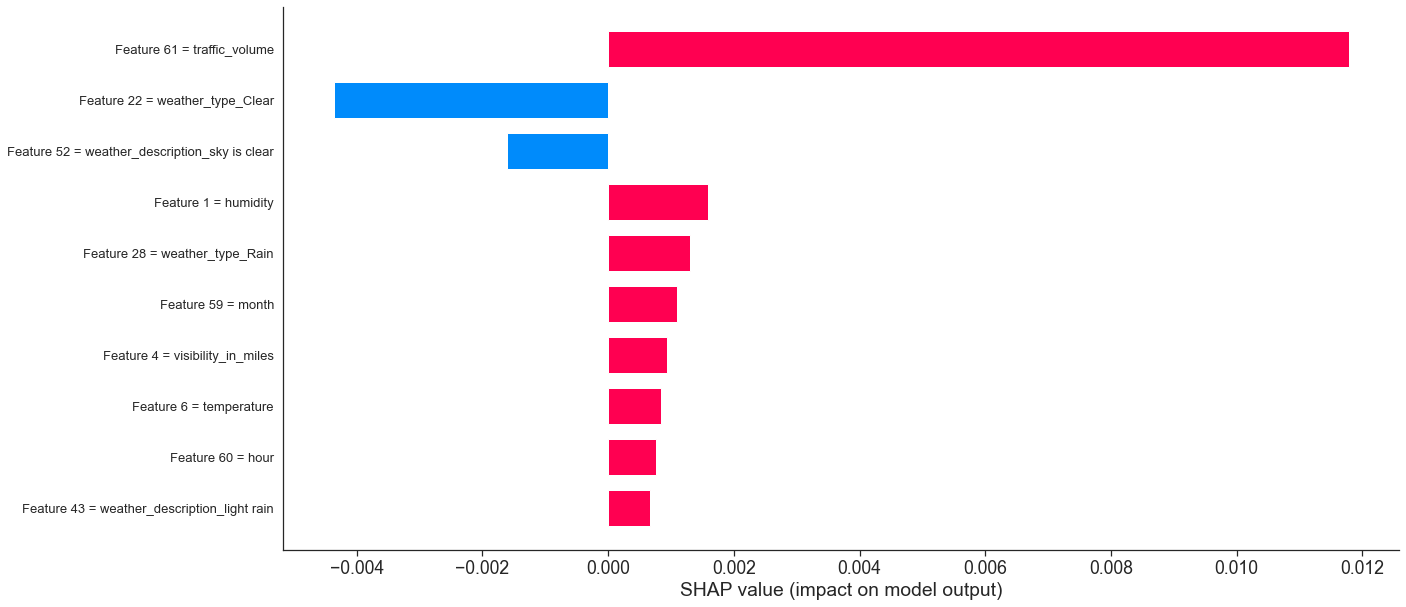

In [26]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values[0][0][0],features, max_display=10)

I want to see the 10 top feature of all timestep for an instance. So I need to sum all shap values for each feature from all timestep for an instance.

In [27]:
shap_values_summed=np.sum(shap_values[0], axis=1)

In [28]:
shap.force_plot(explainer.expected_value[0], shap_values_summed[0], features)

Here's is top 10 feature for the first instance.

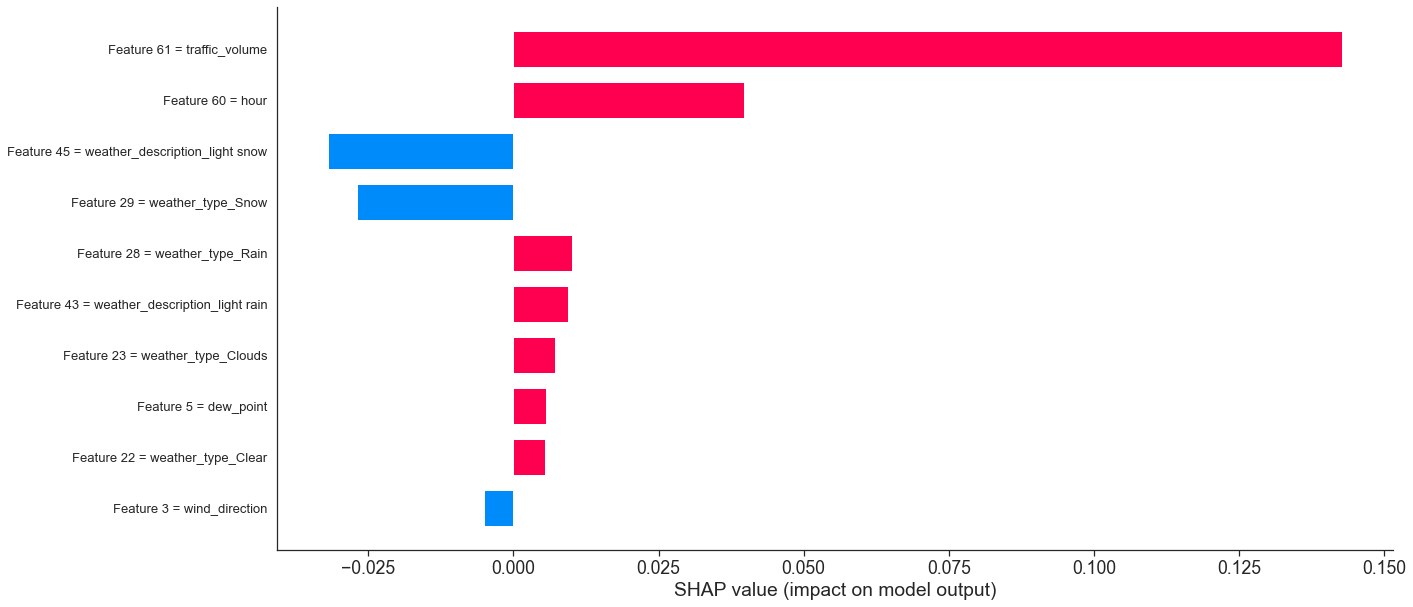

In [29]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_summed[0],features, max_display=10)

**Time Step Importance**

I also want to see how each time step contribute to the predicion. That's why i need to make shap_values for each time_step

In [30]:
shap_values_timestep = np.sum(shap_values[0], axis=2)

In [31]:
feature_timestep = [f'{i} Hour before' for i in range(24, 0, -1)]

In [32]:
shap.force_plot(explainer.expected_value[0], shap_values_timestep[0], feature_timestep)

Here's list of feature (or more like time step) importance

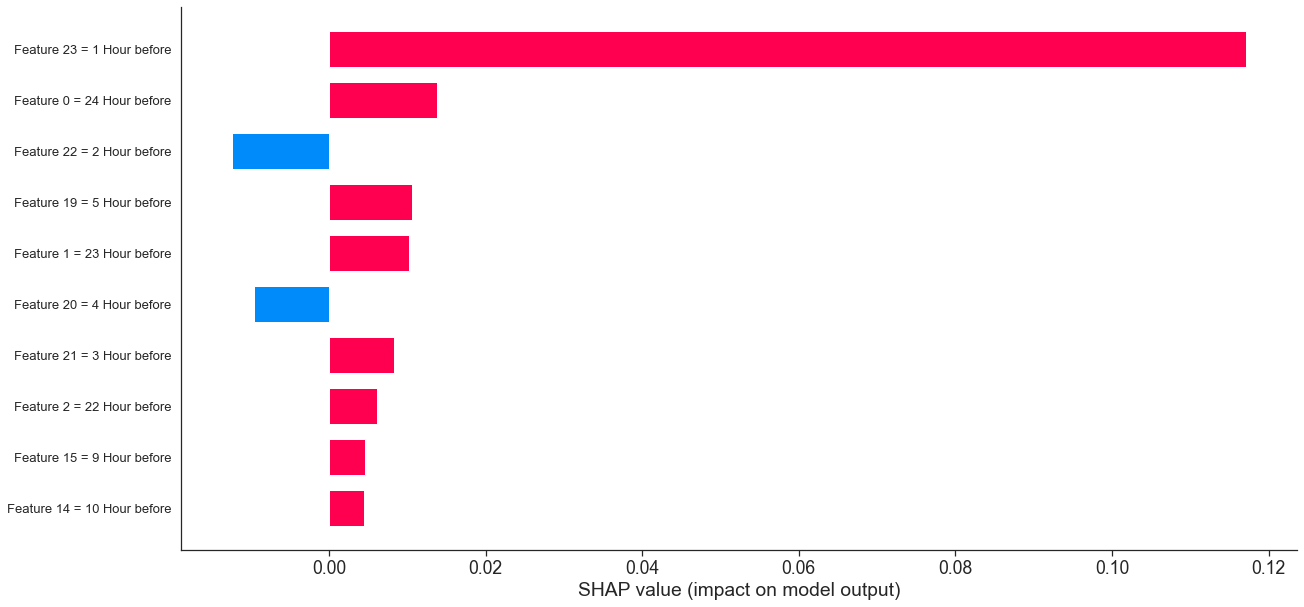

In [33]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_timestep[0],feature_timestep, max_display=10)

Here's the force plot

## Global Explanation

In [34]:
shap.force_plot(explainer.expected_value, shap_values_timestep, feature_timestep)

In [44]:
stacked_force_plot_timestep = shap.force_plot(explainer.expected_value, shap_values_timestep, feature_timestep)

In [47]:
shap.save_html('sfp_timestep.html', stacked_force_plot_timestep)

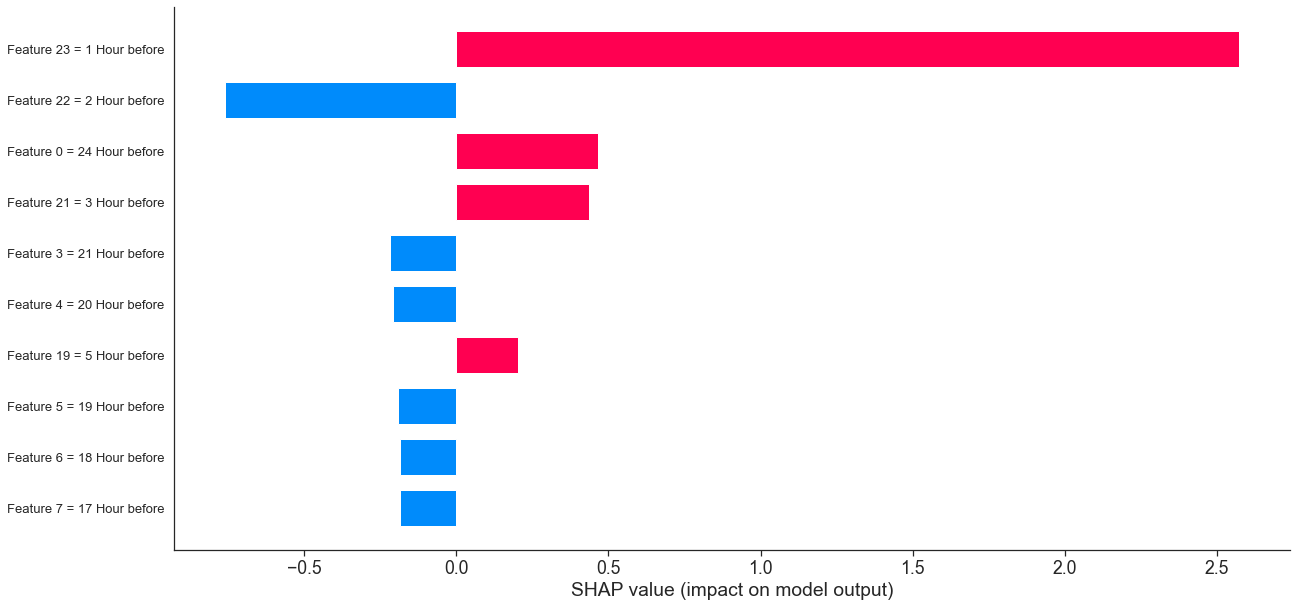

In [35]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(np.sum(shap_values_timestep, axis=0),feature_timestep, max_display=10)

In [36]:
shap.force_plot(explainer.expected_value, shap_values_summed, features)

In [51]:
stacked_force_plot_feature = shap.force_plot(explainer.expected_value, shap_values_summed, features)
shap.save_html('sfp_feature.html', stacked_force_plot_feature)

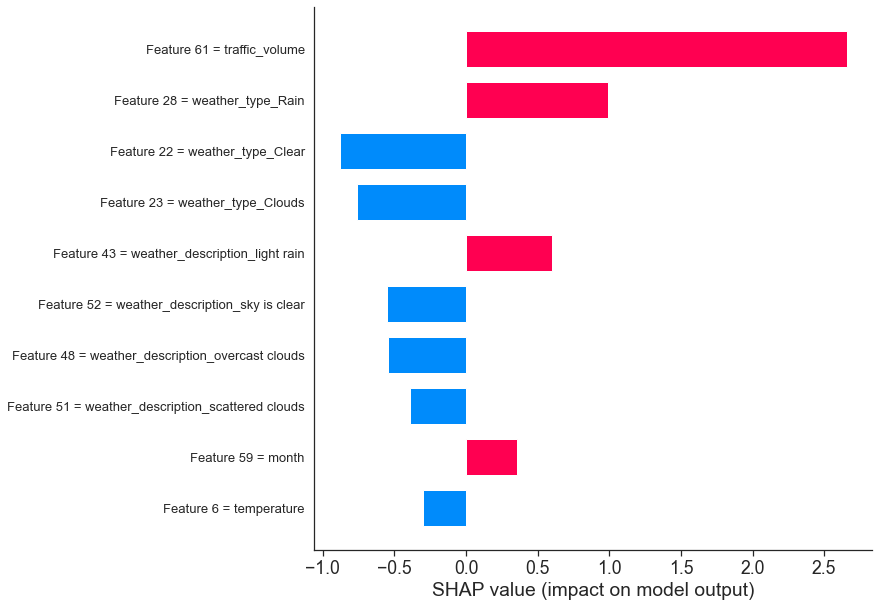

In [53]:
plt.figure(figsize=(10, 10)) 
shap.bar_plot(np.sum(shap_values_summed, axis=0),features, max_display=10)

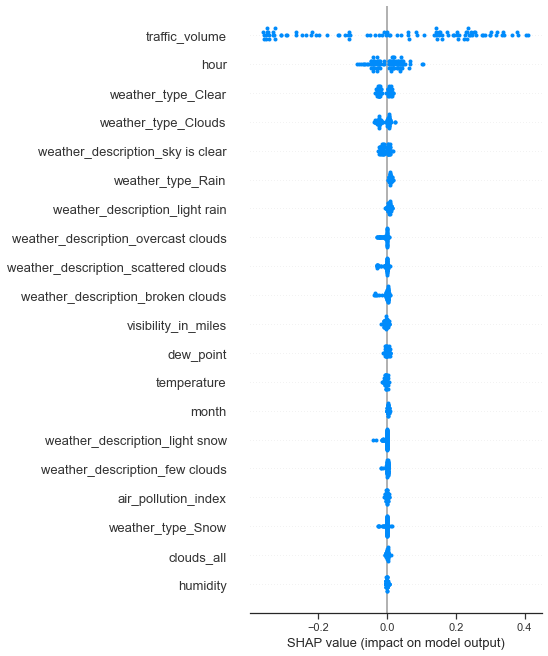

In [38]:
shap.summary_plot(shap_values_summed, features)

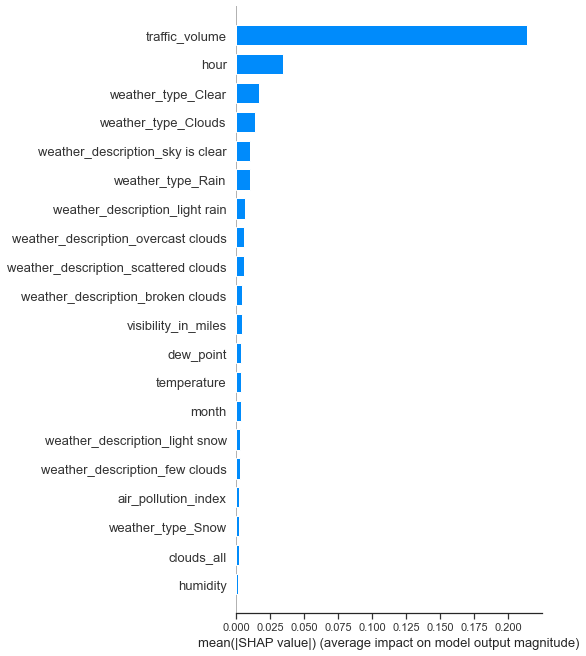

In [39]:
shap.summary_plot(shap_values_summed, features, plot_type="bar")

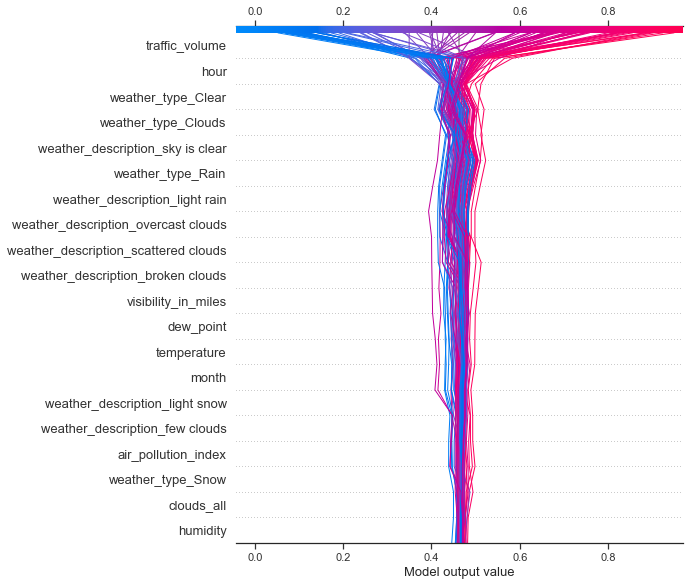

In [40]:
shap.decision_plot(explainer.expected_value, shap_values_summed, features)

In [220]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_summed,features, max_display=10)

TypeError: object of type 'numpy.float64' has no len()

<Figure size 1440x720 with 0 Axes>

In [41]:
shap.force_plot(explainer.expected_value[0], shap_values_summed, features)

In [56]:
shap.plots.waterfall(shap_values[0][0][0])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

Here's my attempt to make a waterfall plot. The attempt failed because apparently, the shap_values output by my deep_explainer is a list instead of explanation instance. Below is my take to fix it by making a new explanation instance using shap values I already had and the base value from the explainer.

In [106]:
pred[0]

array([0.63573], dtype=float32)

In [180]:
sns.set(style="white", font_scale=1.6)

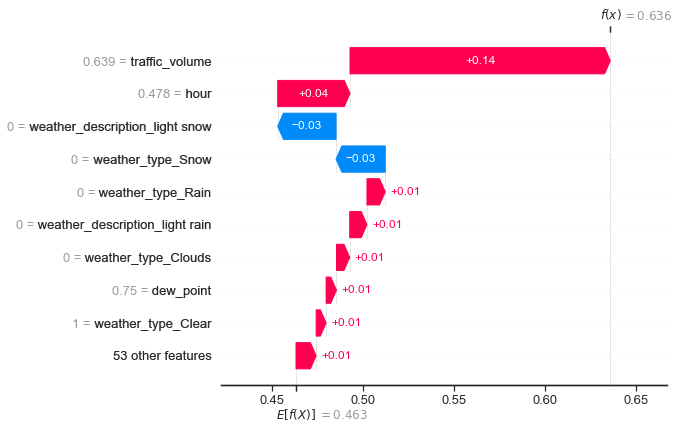

In [42]:
# Assuming 'shap_values' is already calculated and 'X_test' is your test dataset
instance_shap_values = shap_values[0][0]  # Select SHAP values for a specific instance
summed_shap_values = np.sum(instance_shap_values, axis=0)  # Sum over time steps

# Get the base value from the explainer (this might vary based on your model and explainer)
base_value = explainer.expected_value

# Create an Explanation object
explanation = shap.Explanation(values=summed_shap_values, base_values=base_value[0], data=X_test[0][0], feature_names=features)

# Now use this explanation object for the waterfall plot
shap.plots.waterfall(explanation)

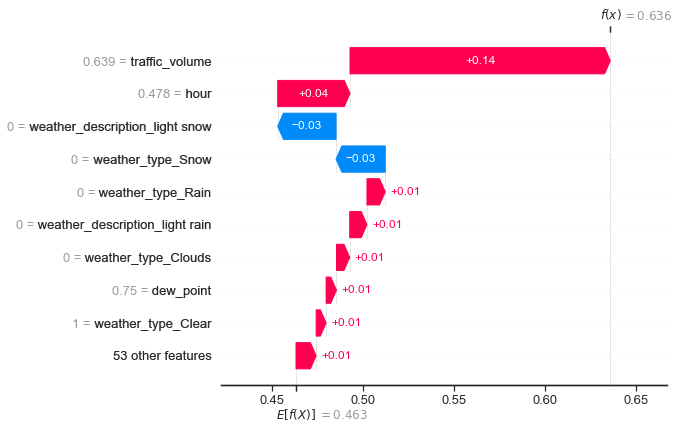

In [43]:
# Assuming 'shap_values' is already calculated and 'X_test' is your test dataset
instance_shap_values = shap_values[0][0]  # Select SHAP values for a specific instance
summed_shap_values = np.sum(instance_shap_values, axis=0)  # Sum over time steps

# Get the base value from the explainer (this might vary based on your model and explainer)
base_value = explainer.expected_value

# Create an Explanation object
explanation = shap.Explanation(values=summed_shap_values, base_values=base_value[0], data=X_test[0][0], feature_names=features)

# Now use this explanation object for the waterfall plot
shap.plots.waterfall(explanation)


In [113]:
shap_values[0][0].shape

(24, 62)

In [114]:
shap_values_summed=[]
for instance in shap_values[0]:
    shap_values_summed.append(np.sum(instance, axis=0))

shap_values_summed = np.array(shap_values_summed)

In [117]:
shap_values_summed.shape

(100, 62)

In [121]:
shap.force_plot(explainer.expected_value[0], shap_values_summed, features)

In [128]:
explainer.expected_value

array([0.45742103], dtype=float32)

In [134]:
X_test[0].shape

(24, 62)

In [135]:
X_test_hehe = []
for instance in X_test[:100]:
    X_test_hehe.append(instance[0])

In [138]:
X_test_hehe = np.array(X_test_hehe)
X_test_hehe.shape

(100, 62)

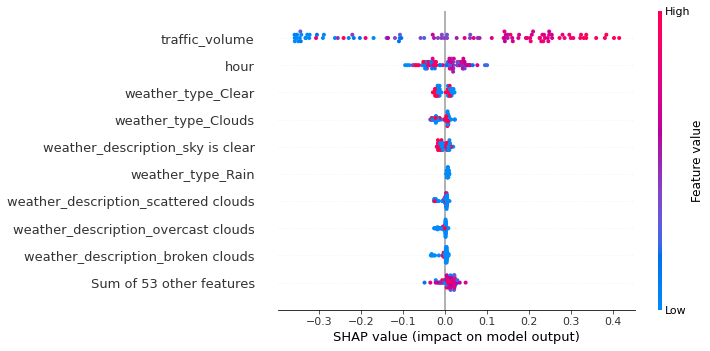

In [139]:
# Get the base value from the explainer (this might vary based on your model and explainer)
base_value = explainer.expected_value

# Create an Explanation object
explanation = shap.Explanation(values=shap_values_summed, base_values=base_value[0], data=X_test_hehe, feature_names=features)

# Now use this explanation object for the waterfall plot
shap.plots.beeswarm(explanation)

In [112]:
shap_values[0].shape

(100, 24, 62)

In [ ]:
# If your model is a multi-output model, you will need to select the appropriate base value
# For example: base_value = explainer.expected_value[0]

In [81]:
explanation

.values =
array([ 7.31402843e-04,  2.46762937e-03, -1.08213611e-03, -3.20897726e-03,
       -4.15108591e-03,  4.34254637e-03, -2.38124413e-03,  1.53999857e-06,
        0.00000000e+00, -2.90461562e-04,  0.00000000e+00,  0.00000000e+00,
        3.20513141e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.60185353e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.74195863e-03,  7.18291772e-03,
        5.01178697e-04,  1.11637493e-03,  1.10996931e-03,  2.29650409e-03,
        5.90645113e-03, -2.71286250e-02,  3.14243287e-04,  1.76789933e-03,
        2.51655779e-04,  1.74761569e-03,  1.26321857e-03,  0.00000000e+00,
        1.70389533e-03,  0.00000000e+00,  6.23549980e-04,  0.00000000e+00,
        1.29524577e-04,  0.00000000e+00,  0.00000000e+00,  5.23948993e-03,
        0.00000000e+00, -3.04195455e-02,  8.84711395e-04,  4.21912643e-04,
       -4.86376621e-04,  4.09693358e-05,  3.12918469e-04,  2.07528745e-03,
        4.38563

In [84]:
type(explanation[0])

shap._explanation.Explanation

In [104]:
# Assuming 'shap_values' is already calculated and 'X_test' is your test dataset
instance_shap_values = shap_values[0][0][0]  # Select SHAP values for a specific instance
summed_shap_values = np.sum(instance_shap_values, axis=0)  # Sum over time steps

# Get the base value from the explainer (this might vary based on your model and explainer)
base_value = explainer.expected_value

# If your model is a multi-output model, you will need to select the appropriate base value
# For example: base_value = explainer.expected_value[0]

# Create an Explanation object
explanation = shap.Explanation(values=shap_values, base_values=base_value[0], data=X_test[0][0], feature_names=features)

# Now use this explanation object for the waterfall plot
shap.plots.beeswarm(explanation)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [68]:
base_value

array([0.45742103], dtype=float32)

In [66]:
import shap
import numpy as np

# Assuming 'shap_values' is already calculated and 'X_test' is your test dataset
instance_shap_values = shap_values[0][0]  # Select SHAP values for a specific instance
summed_shap_values = np.sum(instance_shap_values, axis=0)  # Sum over time steps

# Get the scalar base value from the explainer
# If explainer.expected_value is an array, select the appropriate value
# For a single-output model:
base_value = explainer.expected_value

# For a multi-output model, you might need something like:
# base_value = explainer.expected_value[0] 

# Use the base value and summed SHAP values in the waterfall plot
# Ensure that summed_shap_values is a 1D array
shap.plots.waterfall(base_value, summed_shap_values, X_test[0])


AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [37]:
pred = model.predict(X_test)

In [38]:
type(shap_values)

list

In [39]:
type(shap_values[0])

numpy.ndarray

In [40]:
shap_values[0].shape

(100, 24, 62)

In [87]:
pred[0]

array([0.63573], dtype=float32)

In [42]:
len(shap_values[0][0])

24

In [43]:
shap_values[0][0][0].sum()

0.013830559232757125

In [ ]:
val = 0

for i in range(len(shap_values[0][0])):
    print(shap_values[0][0][i].sum())
    val = val+shap_values[0][0][i].sum()

print(f'total: {val}')

0.021935266507700567
0.013038898875925721
0.003509456168206657
0.001675784712038151
0.001303111038844525
0.0016851834969067005
0.0018983891554891859
0.0015595295075364216
0.001954297283609388
0.0024673442824225253
0.0030083455420004583
0.003945823905816465
0.009142502929850334
0.00489294504100366
0.00475604060989598
0.0025685932431957935
-0.0025364836184717777
-0.005244189671019253
-0.003376851672839818
0.001727618327609285
-0.007810182255659319
-0.006329170050656554
3.2708549296450555e-05
0.131456074112118
total: 0.18726103602081956


In [ ]:
explainer.expected_value

array([0.44255382], dtype=float32)

In [ ]:
plt.gcf().set_size_inches(10, 8)
force_plot_html = shap.force_plot(explainer.expected_value[0], shap_values[0][0][0], features)
with open("force_plot.html", "w") as f:
    f.write(force_plot_html.html())

<Figure size 720x576 with 0 Axes>

In [27]:
shap_values_daily = []

for i in range(len(shap_values[0][0])):
    shap_values_daily.append(shap_values[0][0][i].sum())

In [28]:
shap_values_daily = np.array(shap_values_daily)

In [29]:
shap_values_daily.shape

(24,)

In [30]:
shap_values[0][0][5].shape

(62,)

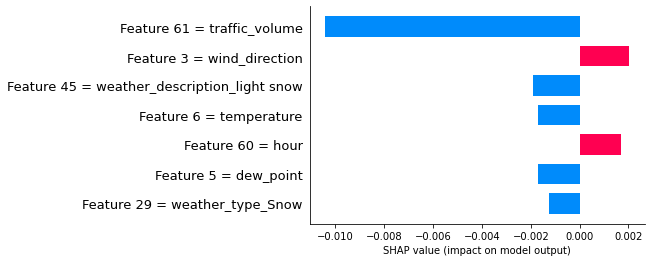

In [31]:
shap.bar_plot(shap_values[0][0][22], features)

In [64]:
feature_daily = []
for i in range(24, 0, -1):
    feature_daily.append(f'{i} Hour before')

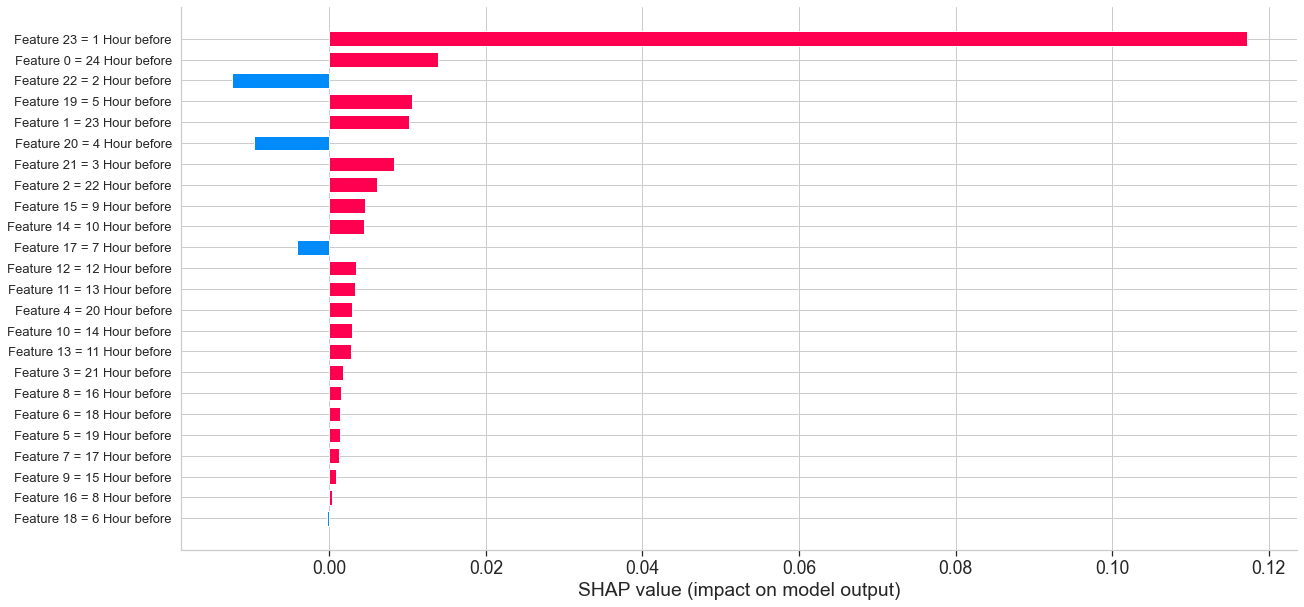

In [162]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_daily,feature_daily, max_display=35)

In [34]:
shap_values[0][0].shape

(24, 62)

In [35]:
shap_values_sum = np.sum(shap_values[0][0], axis=0)
shap_values_sum

array([ 8.12884119e-04,  3.15142784e-03, -1.29150754e-03, -5.02682320e-03,
       -4.70946444e-03,  5.69205694e-03, -2.44180182e-03,  5.93377135e-07,
        0.00000000e+00, -6.79845000e-04,  0.00000000e+00,  0.00000000e+00,
        1.57722762e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.04626353e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.46146254e-03,  7.25070089e-03,
        1.09902229e-04,  1.16056478e-03,  4.20007490e-04,  1.60802225e-03,
        1.00385340e-02, -2.69722770e-02,  6.43563139e-05,  2.40774446e-03,
        3.75608764e-05,  3.34192722e-03,  1.37358908e-03,  0.00000000e+00,
        6.64508817e-04,  0.00000000e+00,  2.00108026e-04,  0.00000000e+00,
        6.54086361e-05,  0.00000000e+00,  0.00000000e+00,  9.45894756e-03,
        0.00000000e+00, -3.20148192e-02,  9.02411806e-04,  5.26565603e-04,
       -1.28125193e-03,  0.00000000e+00,  4.99069253e-05,  5.10701650e-04,
        2.62102966e-03,  

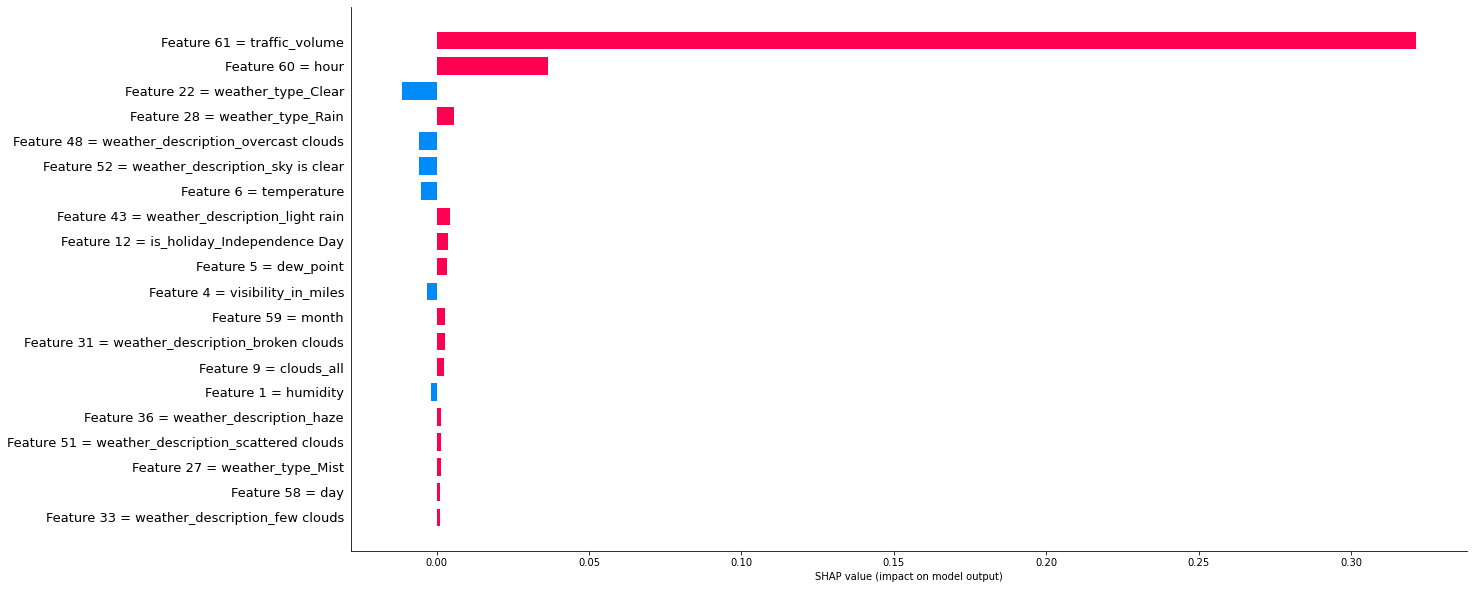

In [145]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_summed[45],features, max_display=20)

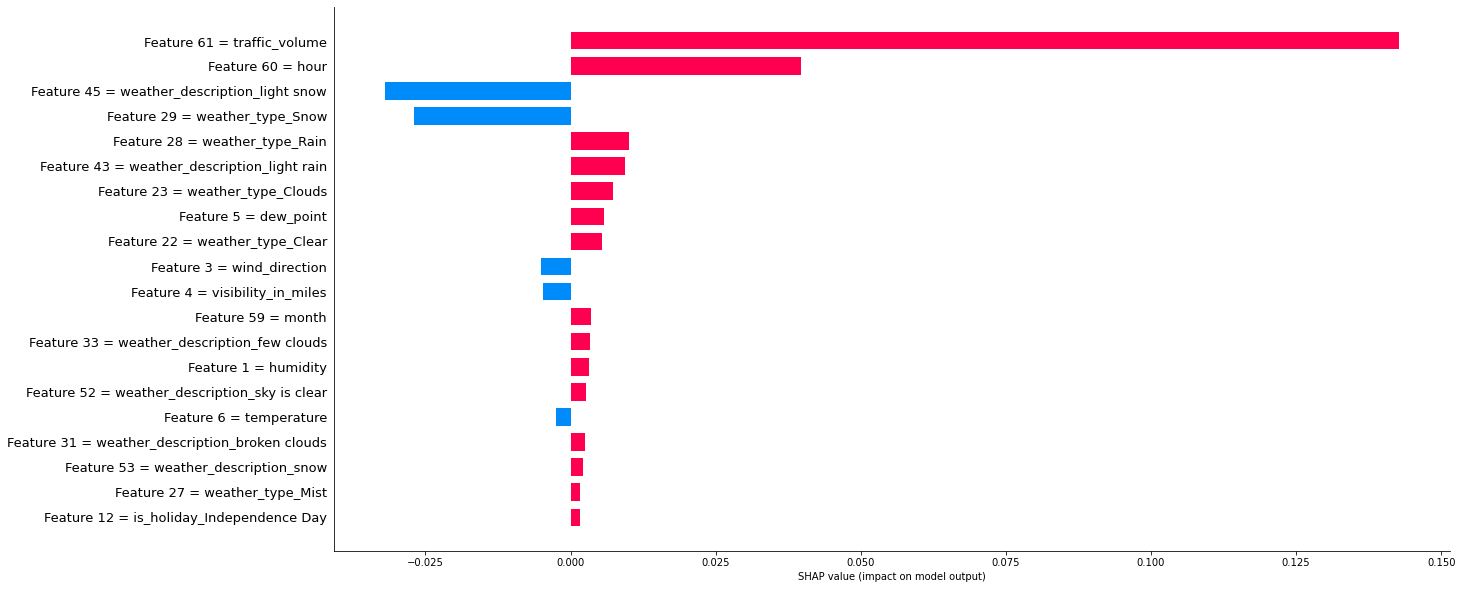

In [36]:
plt.figure(figsize=(20, 10)) 
shap.bar_plot(shap_values_sum,features, max_display=20)

In [89]:
df_ori = pd.read_csv('dataset/Train.csv')

In [90]:
df_ori

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
